In [1]:
import tensorflow as tf
from tensorflow.keras.layers import MultiHeadAttention,Embedding,Dense,Activation,Flatten,Input,BatchNormalization,Dropout,GlobalAveragePooling1D,Concatenate,MultiHeadAttention,LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.metrics import F1Score,Recall,Precision,BinaryAccuracy
from pyvi import ViTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sys
import pandas as pd 
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm
import tensorflow.keras.backend as K
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback

2025-03-22 18:42:57.358011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-22 18:42:57.430476: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-22 18:42:57.453369: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-22 18:42:57.605657: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-22 18:42:58.701970: W tensorflow/compiler/tf2

In [1]:
# load data
"""
    Đọc file txt 
""" 
df = pd.read_csv("synthetic_data_0.txt", delimiter="_", header=None)
print(df.head(1))
print(df.shape)

NameError: name 'pd' is not defined

In [3]:
data_y_ = df.iloc[:,-1]
unique, counts = np.unique(data_y_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 316234, 1: 183766}


In [4]:
def encryption(key_word_, data_ ):
    """
        Tokenize theo từ khóa số từ tương ứng với số khóa
    """
    lookup_ = tf.keras.layers.StringLookup(output_mode="int")
    lookup_.adapt(data_)
    new_data_ = np.array(lookup_(data_)).reshape(-1,1)
    print(f"-{key_word_} trước khi mã hóa: {np.array(data_[0:3]).reshape(3)}   {key_word_} sau khi mã hóa: {new_data_[0:3].reshape(3)}")
    return new_data_
def convert_number_log(key_word_,data_):
    prite_product_ = np.log(data_.astype(np.float64)+1).reshape(-1,1)
    print(f"-{key_word_} trước khi mã hóa: {data_[0]}    {key_word_} sau khi mã hóa: {prite_product_[0]}")
    return prite_product_
def tokennize(key_word_, data_):
    """
        TOkenize theo loại mỗi loại mang một số duy nhất 
    """
    tokenized_data = [ViTokenizer.tokenize(i) for i in data_]
    tokenize_ = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', split=" ")
    tokenize_.fit_on_texts(tokenized_data)
    new_data_ = tokenize_.texts_to_sequences(tokenized_data)
    new_data_ = np.array(pad_sequences(new_data_,padding="post",truncating="post"))
    print(f"-{key_word_} trước khi tokennize: {tokenized_data[0]}    {key_word_} sau khi tokennize: {new_data_[0]}")
    return new_data_

In [5]:
age_ = np.array(df.iloc[:,1]).astype(np.float64).reshape(-1,1)
print(f"-Tuổi của người dùng: {age_[0:5].reshape(-1)}")
month_user_ = np.array(df.iloc[:,2]).astype(np.float64).reshape(-1,1)
print(f"-Tháng sinh của người dùng: {month_user_[0:5].reshape(-1)}")
job_ = encryption("Nghề nghiệp của người dùng",df.iloc[:,3])
sex_ = np.array(df.iloc[:,4]+1).astype(np.float64).reshape(-1,1)
print(f"-Giới tính của người dùng: {sex_[0:5].reshape(-1)}")
total_money_buy_product_ = convert_number_log(key_word_="Trung bình số tiền mỗi lần mua hàng 30 ngày gần nhất",data_=np.array(df.iloc[:,5]))
number_click_ = np.array(df.iloc[:,6]+1).astype(np.float64).reshape(-1,1)
print(f"-Số lần click vào sản phẩm: {number_click_[0:5].reshape(-1)}")
search_ = tokennize("3 lịch sử tìm kiếm gần nhất",df.iloc[:,7])
number_buy_ = np.array(df.iloc[:,8]+1).astype(np.float64).reshape(-1,1)
print(f"-Số lần mua: {number_buy_[0:5].reshape(-1)}")
month_buy_product_ = np.array(df.iloc[:,9]).astype(np.float64).reshape(-1,1)
print(f"-Tháng mua sản phẩm: {month_buy_product_[0:5].reshape(-1)}")
total_buy_product_ = np.array(df.iloc[:,10]).astype(np.float64).reshape(-1,1)
print(f"-Tổng số lượng sản phẩm mà người dùng mua trong 30 ngày gần nhất: {total_buy_product_[0:5].reshape(-1)}")
name_product_buy_ = tokennize("Tên sản phẩm mua lần gần nhất",df.iloc[:,11])
number_last_day_buy_product_ = np.array(df.iloc[:,12]).astype(np.float64).reshape(-1,1)
print(f"-Khoản cách mua sản phẩm này gần nhất: {number_last_day_buy_product_[0:5].reshape(-1)}")
number_cancel_product_ = np.array(df.iloc[:,13]+1).astype(np.float64).reshape(-1,1)
print(f"-Số lần hủy sản phẩm: {number_cancel_product_[0:5].reshape(-1)}")
number_return_product_ = np.array(df.iloc[:,14]+1).astype(np.float64).reshape(-1,1)
print(f"-Số lần trả sản phẩm: {number_return_product_[0:5].reshape(-1)}")
number_not_buy_product_ = np.array(df.iloc[:,15]+1).astype(np.float64).reshape(-1,1)
print(f"-Số lần thêm nhưng không mua sản phẩm: {number_not_buy_product_[0:5].reshape(-1)}")
rate_product_ = np.array(df.iloc[:,16]+1).astype(np.float64).reshape(-1,1)
print(f"-Số điểm sản phẩm: {rate_product_[0:5].reshape(-1)}")
coment_product_ = tokennize("3 Bình luận về sản phẩm",df.iloc[:,17])
discount_ = np.array(df.iloc[:,18]+1).astype(np.float64).reshape(-1,1)
print(f"-Giảm giá: {discount_[0:5].reshape(-1)}")
name_product_ = tokennize("-Tên sản phẩm",df.iloc[:,19])
type_ = encryption("Loại sản phẩm",df.iloc[:,20])
seasion_ = encryption("Mùa ra mắt sản phẩm",df.iloc[:,21])
color_ = encryption("Màu sản phẩm",df.iloc[:,22])
brand_ = encryption("Thương hiệu sản phẩm",df.iloc[:,23])
style_ = encryption("Phong cách sản phẩm",df.iloc[:,24])
size_ = encryption("Size sản phẩm",df.iloc[:,25])
sales_product_ = np.array(df.iloc[:,26]+1).astype(np.float64).reshape(-1,1)
print(f"-Lượt bán sản phẩm trong 30 ngày gần nhất: {sales_product_[0:5].reshape(-1)}")
price_product_ = convert_number_log(key_word_="Giá tiền sản phẩm",data_=np.array(df.iloc[:,27]))
desription_ = tokennize("Mô tả sản phẩm",df.iloc[:,28])

-Tuổi của người dùng: [18. 56. 29. 48. 22.]
-Tháng sinh của người dùng: [6. 8. 7. 7. 3.]


I0000 00:00:1742643811.001333   10844 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742643811.215302   10844 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742643811.215389   10844 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742643811.219081   10844 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742643811.219165   10844 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

-Nghề nghiệp của người dùng trước khi mã hóa: ['Kỹ sư điện' 'Nhân viên y tế cộng đồng' 'Nhà phân tích thị trường']   Nghề nghiệp của người dùng sau khi mã hóa: [ 59 132 131]
-Giới tính của người dùng: [2. 2. 1. 1. 1.]
-Trung bình số tiền mỗi lần mua hàng 30 ngày gần nhất trước khi mã hóa: 337.41    Trung bình số tiền mỗi lần mua hàng 30 ngày gần nhất sau khi mã hóa: [5.82425818]
-Số lần click vào sản phẩm: [17. 94. 24. 31. 62.]
-3 lịch sử tìm kiếm gần nhất trước khi tokennize: váy maxi , quần yếm nữ , mũ lưỡi_trai nam    3 lịch sử tìm kiếm gần nhất sau khi tokennize: [23 13  4 61  1 10 30  2  0  0  0  0]
-Số lần mua: [17. 17. 22. 17. 13.]
-Tháng mua sản phẩm: [ 9.  4. 11.  8. 11.]
-Tổng số lượng sản phẩm mà người dùng mua trong 30 ngày gần nhất: [35. 39. 42. 42. 10.]
-Tên sản phẩm mua lần gần nhất trước khi tokennize: Áo_khoác nữ    Tên sản phẩm mua lần gần nhất sau khi tokennize: [21  1  0]
-Khoản cách mua sản phẩm này gần nhất: [60. 52.  3. 49. 21.]
-Số lần hủy sản phẩm: [10.  2.  7.

In [6]:
data_x1_ = np.concatenate((age_,
                           month_user_,
                           job_,
                           sex_,),axis=1)
data_x2_ = np.concatenate((
                          total_money_buy_product_,
                          number_click_,
                          search_,
                          number_buy_,
                          number_last_day_buy_product_,
                          number_cancel_product_,
                          number_not_buy_product_,
                          number_return_product_
                          ),axis=1)
data_x3_ = np.concatenate((
                          name_product_,
                          type_,
                          seasion_,
                          color_,
                          brand_,
                          style_,
                          size_),axis=1)
data_x4_ = np.concatenate((
                          rate_product_,
                          coment_product_),axis=1)
data_x5_ = np.concatenate((
                          total_buy_product_,
                          price_product_,
                          discount_),axis=1)
data_x6_ = np.array(desription_)
data_x7_ = np.concatenate((        
                          month_buy_product_,
                          name_product_buy_,
                          sales_product_,
                          ),axis=1)
data_y_ = df.iloc[:,-1]

# Gộp tất cả dữ liệu vào một tuple
data_x = (data_x1_, data_x2_, data_x3_, data_x4_, data_x5_, data_x6_, data_x7_)

# Shuffle tất cả dữ liệu cùng với nhãn
shuffled = shuffle(*data_x, data_y_, random_state=42)

# Giải nén dữ liệu đã shuffle
data_x1_, data_x2_, data_x3_, data_x4_, data_x5_, data_x6_, data_x7_, data_y_ = shuffled

# Kiểm tra lại shape sau khi shuffle
print(f"-Shape dữ liệu nhóm 1: {data_x1_.shape}")
print(f"-Shape dữ liệu nhóm 2: {data_x2_.shape}")
print(f"-Shape dữ liệu nhóm 3: {data_x3_.shape}")
print(f"-Shape dữ liệu nhóm 4: {data_x4_.shape}")
print(f"-Shape dữ liệu nhóm 5: {data_x5_.shape}")
print(f"-Shape dữ liệu nhóm 6: {data_x6_.shape}")
print(f"-Shape dữ liệu nhóm 7: {data_x7_.shape}")
print(f"-Shape nhãn: {data_y_.shape}")

-Shape dữ liệu nhóm 1: (500000, 4)
-Shape dữ liệu nhóm 2: (500000, 19)
-Shape dữ liệu nhóm 3: (500000, 9)
-Shape dữ liệu nhóm 4: (500000, 61)
-Shape dữ liệu nhóm 5: (500000, 3)
-Shape dữ liệu nhóm 6: (500000, 131)
-Shape dữ liệu nhóm 7: (500000, 5)
-Shape nhãn: (500000,)


In [7]:
from tensorflow.keras.utils import register_keras_serializable

# @register_keras_serializable
class PositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, d_model,name_,trainable=True,dtype="float32"):
        super().__init__(name=name_,trainable=trainable,dtype=dtype)
        self.pos_emb = self.add_weight(
            shape=(sequence_length, d_model),  # Ma trận vị trí (số đặc trưng x d_model)
            initializer="random_normal",
            trainable=True,
            name="position_embedding"
        )

    def call(self, inputs, training=True):
        return inputs + self.pos_emb  # Cộng thẳng vào embedding    

# @register_keras_serializable
class encode(tf.keras.layers.Layer):
    def __init__(self, deep_, num_head_, dropout_rate_, name_,trainable=True,dtype="float32"):
        super(encode, self).__init__(name=name_,trainable=trainable,dtype=dtype)
        self.attention_ = MultiHeadAttention(num_heads = num_head_, key_dim = deep_)
        self.dense_ = Dense(deep_,kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), activation='relu')
        self.l1_ = LayerNormalization(epsilon=1e-6)
        self.dr1_ = Dropout(dropout_rate_)
        self.l2_ = LayerNormalization(epsilon=1e-6)
        self.dr2_ = Dropout(dropout_rate_)

    def call(self, input, training=True):
        x1_ = self.attention_(input[0],input[0])
        # x2_ = self.dr1_(x1_)
        x3_ = self.l1_(x1_+input[1])

        x4_ = self.dense_(x3_)
        # x5_ = self.dr2_(x4_)
        x6_ = self.l2_(x4_+x3_)

        return x6_

# @register_keras_serializable
class emded(tf.keras.layers.Layer):
    def __init__(self, data_x1_, data_x2_, data_x3_, data_x4_, data_x5_,data_x6_,data_x7_, name_, deep_,trainable=True,dtype="float32"):
        super(emded, self).__init__(name=name_,trainable=trainable,dtype=dtype)
        self.input_dims = [int(np.max(data_x1_)+1), int(np.max(data_x2_)+1), 
                           int(np.max(data_x3_)+1), int(np.max(data_x4_)+1), 
                           int(np.max(data_x5_)+1),int(np.max(data_x6_)+1),
                           int(np.max(data_x7_)+1)]
        self.output_dims = [min(int(np.sqrt(dim))+1, 50) for dim in self.input_dims]
        self.deep = deep_

        self.embed_layers = [Embedding(input_dim=dim, output_dim=out_dim) 
                             for dim, out_dim in zip(self.input_dims, self.output_dims)]
        self.dense_layers = [Dense(self.deep, use_bias=False) for _ in range(5)]
        self.concat_ = Concatenate(axis=1)

    def call(self, inputs, training=True):
        x1_, x2_, x3_, x4_, x5_,x6_,x7_ = inputs
        x_embedded = [embed(x) for embed, x in zip(self.embed_layers, [x1_, x2_, x3_, x4_, x5_,x6_,x7_])]
        x_dense = [dense(x) for dense, x in zip(self.dense_layers, x_embedded)]
        return self.concat_(x_dense)

    def get_config(self):
        config = super().get_config()
        config.update({
            "input_dims": self.input_dims,
            "output_dims": self.output_dims,
            "deep": self.deep
        })
        return config

    @classmethod
    def from_config(cls, config):
        # Khởi tạo object với các giá trị mặc định hợp lý
        return cls(
            data_x1_=np.zeros(config["input_dims"][0]-1),  
            data_x2_=np.zeros(config["input_dims"][1]-1),
            data_x3_=np.zeros(config["input_dims"][2]-1),
            data_x4_=np.zeros(config["input_dims"][3]-1),
            data_x5_=np.zeros(config["input_dims"][4]-1),
            data_x6_=np.zeros(config["input_dims"][5]-1),
            data_x7_=np.zeros(config["input_dims"][6]-1),
            name_="restored_emded",
            deep_=config["deep"]
        )
        
# @register_keras_serializable 
class output(tf.keras.layers.Layer):
    def __init__(self, dropout_rate, deep_, name_,trainable=True,dtype="float32"):
        super(output, self).__init__(name=name_,trainable=trainable,dtype=dtype)
        self.dense_out1_ = Dense(deep_)
        self.l_out1_ = LayerNormalization(epsilon=1e-6)
        self.d_out1_ = Dropout(0.2)

    def call(self, input, training=True):
        x_ = self.dense_out1_(input)
        x_ = self.l_out1_(x_)
        x_ = self.d_out1_(x_)
        
        return x_


In [14]:
input1_ = Input(shape=(len(data_x1_[0]),))
input2_ = Input(shape=(len(data_x2_[0]),))
input3_ = Input(shape=(len(data_x3_[0]),))
input4_ = Input(shape=(len(data_x4_[0]),))
input5_ = Input(shape=(len(data_x5_[0]),))
input6_ = Input(shape=(len(data_x6_[0]),))
input7_ = Input(shape=(len(data_x7_[0]),))


emded_ = emded(data_x1_, data_x2_, data_x3_, data_x4_, data_x5_,data_x6_,data_x7_, "embeding", 256)([input1_,input2_,input3_,input4_,input5_,input6_,input7_])

pos_ = PositionEmbedding(sequence_length=emded_.shape[1], d_model = 256,name_ = "pos_1")(emded_)

encode1_ = encode(deep_ = 256, num_head_ = 2, dropout_rate_ = 0.2, name_="encode_1")([pos_,pos_])

flatten_ = GlobalAveragePooling1D(name="flatten_1")(encode1_)

out1_ = output(dropout_rate = 0.2, deep_ = 256, name_ = "ffn_output_1")(flatten_)

out_full_ = Dense(1,activity_regularizer = regularizers.l2(0.0001),activation='sigmoid',name="output")(out1_)

model_ = Model([input1_,input2_,input3_,input4_,input5_,input6_,input7_],out_full_,name="test_model")
model_.summary()

Model: "test_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_15      │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_16      │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 61)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_18      │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_19      │ (None, 131)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_20      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embeding (emded)    │ (None, 96, 256)   │     54,972 │ input_layer_14[0… │
│                     │                   │            │ input_layer_15[0… │
│                     │                   │            │ input_layer_16[0… │
│                     │                   │            │ input_layer_17[0… │
│                     │                   │            │ input_layer_18[0… │
│                     │                   │            │ input_layer_19[0… │
│                     │                   │            │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pos_1               │ (None, 96, 256)   │     24,576 │ embeding[0][0]    │
│ (PositionEmbedding) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encode_1 (encode)   │ (None, 96, 256)   │    592,896 │ pos_1[0][0],      │
│                     │                   │            │ pos_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1           │ (None, 256)       │          0 │ encode_1[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn_output_1        │ (None, 256)       │     66,304 │ flatten_1[0][0]   │
│ (output)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │        257 │ ffn_output_1[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 739,005 (2.82 MB)

 Trainable params: 739,005 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
threshold_ = 0.6

opt = tf.keras.optimizers.Adam(learning_rate=1e-4,clipnorm=1.0)
loss = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1)

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name="f1_score", threshold=threshold_, **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.threshold = threshold
        self.true_positives = self.add_weight(name="tp", initializer="zeros")
        self.false_positives = self.add_weight(name="fp", initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(y_pred > self.threshold, tf.float32)  # Chuyển xác suất thành nhãn 0-1
        y_true = tf.cast(y_true, tf.float32)

        tp = tf.reduce_sum(y_true * y_pred)  # True Positives
        fp = tf.reduce_sum((1 - y_true) * y_pred)  # False Positives
        fn = tf.reduce_sum(y_true * (1 - y_pred))  # False Negatives

        self.true_positives.assign_add(tp)
        self.false_positives.assign_add(fp)
        self.false_negatives.assign_add(fn)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        return 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

    def reset_state(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

In [16]:
model_.compile(optimizer=opt,loss=loss,metrics=[F1Score(),BinaryAccuracy(),Recall(),Precision()])

In [17]:
h_ = model_.fit(
    [data_x1_,data_x2_,data_x3_,data_x4_,data_x5_,data_x6_,data_x7_],data_y_,
    epochs = 80,
    validation_split = 0.1
) 

Epoch 1/80


/home/lymi/miniconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_23', 'keras_tensor_24', 'keras_tensor_25', 'keras_tensor_26', 'keras_tensor_27', 'keras_tensor_28', 'keras_tensor_29']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*')
  warnings.warn(
/home/lymi/miniconda3/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:731: UserWarning: Gradients do not exist for variables ['embeddings', 'embeddings'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
I0000 00:00:1742645172.273266   11009 service.cc:146] XLA service 0x7fd0a00033f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742645172.273300   11009 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-03-22 19:06:12.3834

14047/14063 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8066 - f1_score: 0.6536 - loss: 0.5924 - precision_1: 0.7681 - recall_1: 0.6450

2025-03-22 19:07:42.304846: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_70', 1412 bytes spill stores, 1652 bytes spill loads

2025-03-22 19:07:42.604700: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_120', 28 bytes spill stores, 28 bytes spill loads

2025-03-22 19:07:44.137025: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_122', 96 bytes spill stores, 96 bytes spill loads

2025-03-22 19:07:46.070848: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_72', 2116 bytes spill stores, 2628 bytes spill loads



14063/14063 ━━━━━━━━━━━━━━━━━━━━ 108s 7ms/step - binary_accuracy: 0.8067 - f1_score: 0.6537 - loss: 0.5923 - precision_1: 0.7682 - recall_1: 0.6451 - val_binary_accuracy: 0.9326 - val_f1_score: 0.9095 - val_loss: 0.3212 - val_precision_1: 0.8925 - val_recall_1: 0.9281
Epoch 2/80
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step - binary_accuracy: 0.9309 - f1_score: 0.9009 - loss: 0.3178 - precision_1: 0.9052 - recall_1: 0.9074 - val_binary_accuracy: 0.9298 - val_f1_score: 0.8853 - val_loss: 0.3104 - val_precision_1: 0.9475 - val_recall_1: 0.8560
Epoch 3/80
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 86s 6ms/step - binary_accuracy: 0.9357 - f1_score: 0.9081 - loss: 0.3011 - precision_1: 0.9128 - recall_1: 0.9130 - val_binary_accuracy: 0.9418 - val_f1_score: 0.9189 - val_loss: 0.2900 - val_precision_1: 0.9143 - val_recall_1: 0.9282
Epoch 4/80
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step - binary_accuracy: 0.9390 - f1_score: 0.9128 - loss: 0.2952 - precision_1: 0.9165 - recall_1: 0.9175 - val_binary_ac

In [18]:
model_.save_weights("model_weights.weights.h5")

/home/lymi/miniconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_23', 'keras_tensor_24', 'keras_tensor_25', 'keras_tensor_26', 'keras_tensor_27', 'keras_tensor_28', 'keras_tensor_29']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*')
  warnings.warn(


15625/15625 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step


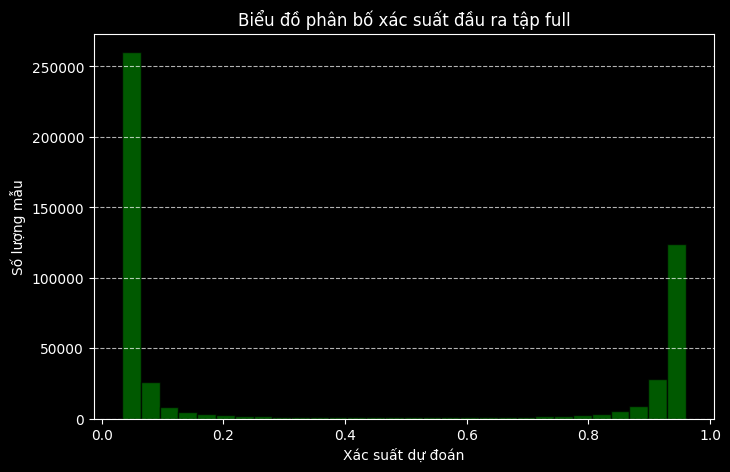

In [19]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")


def draw(x_test,key):
    y_pred_test_ = model_.predict(x_test)
    plt.figure(figsize=(8, 5))
    plt.hist(y_pred_test_, bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.xlabel('Xác suất dự đoán')
    plt.ylabel('Số lượng mẫu')
    plt.title('Biểu đồ phân bố xác suất đầu ra tập '+key)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    return y_pred_test_

y_pred_test_ = draw([data_x1_,data_x2_,data_x3_,data_x4_,data_x5_,data_x6_,data_x7_],"full")


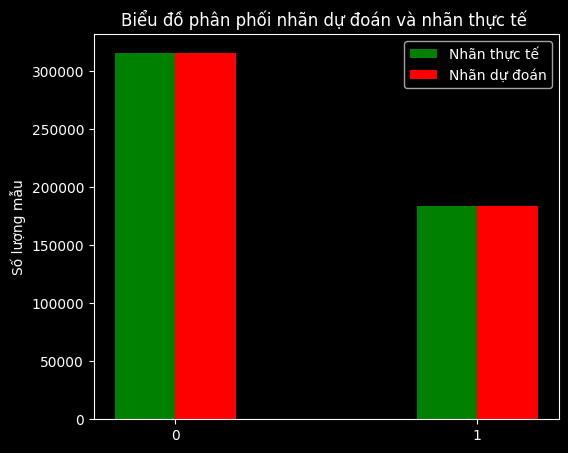

In [25]:
threshold_ = 0.5
def draw_(data_y_,y_pred, key):
    # Đếm số lượng nhãn thực tế
    true_counts = [np.sum(data_y_ == 0), np.sum(data_y_ == 1)]
    # Chuyển y_pred thành dạng nhãn nhị phân
    a = (y_pred > threshold_).astype(int)
    
    # Đếm số lượng nhãn dự đoán
    pred_counts = [np.sum(a == 0), np.sum(a == 1)]
    
    # Vẽ biểu đồ cột
    labels = ['0', '1']
    x = np.arange(len(labels))
    width = 0.2  # Độ rộng của cột
    
    plt.figure(figsize=(6, 5))
    plt.bar(x - width/2, true_counts, width, label="Nhãn thực tế", color="green", alpha=1)
    plt.bar(x + width/2, pred_counts, width, label="Nhãn dự đoán", color="red", alpha=1)
    
    # Gán nhãn
    plt.xticks(x, labels)
    plt.ylabel("Số lượng mẫu")
    plt.title("Biểu đồ phân phối nhãn dự đoán và nhãn thực tế ")
    plt.legend()
    plt.show()



draw_(data_y_,y_pred_test_, "test")

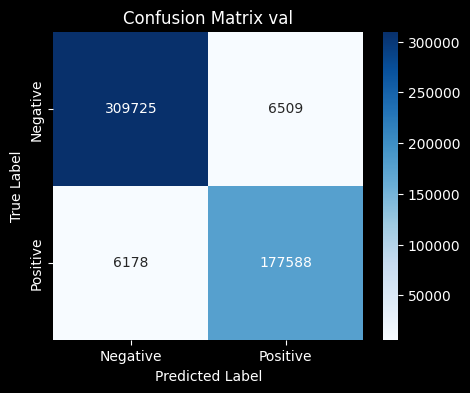

In [21]:
def plot_confusion_matrix(y_true, y_pred, threshold,key):
    """
    Vẽ confusion matrix cho bài toán phân loại nhị phân.
    
    - y_true: Nhãn thật (list hoặc numpy array)
    - y_pred: Xác suất dự đoán (list hoặc numpy array)
    - threshold: Ngưỡng để chuyển đổi xác suất thành nhãn (mặc định 0.5)
    """
    # Chuyển đổi xác suất thành nhãn nhị phân
    y_pred_binary = (y_pred >= threshold).astype(int)
    
    # Tính Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_binary)
    
    # Vẽ heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix "+key)
    plt.show()

plot_confusion_matrix(data_y_,y_pred_test_,0.5, "val")

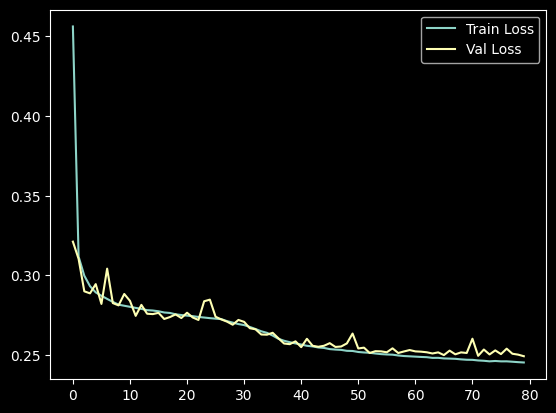

In [22]:
plt.plot(h_.history['loss'], label='Train Loss')
plt.plot(h_.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

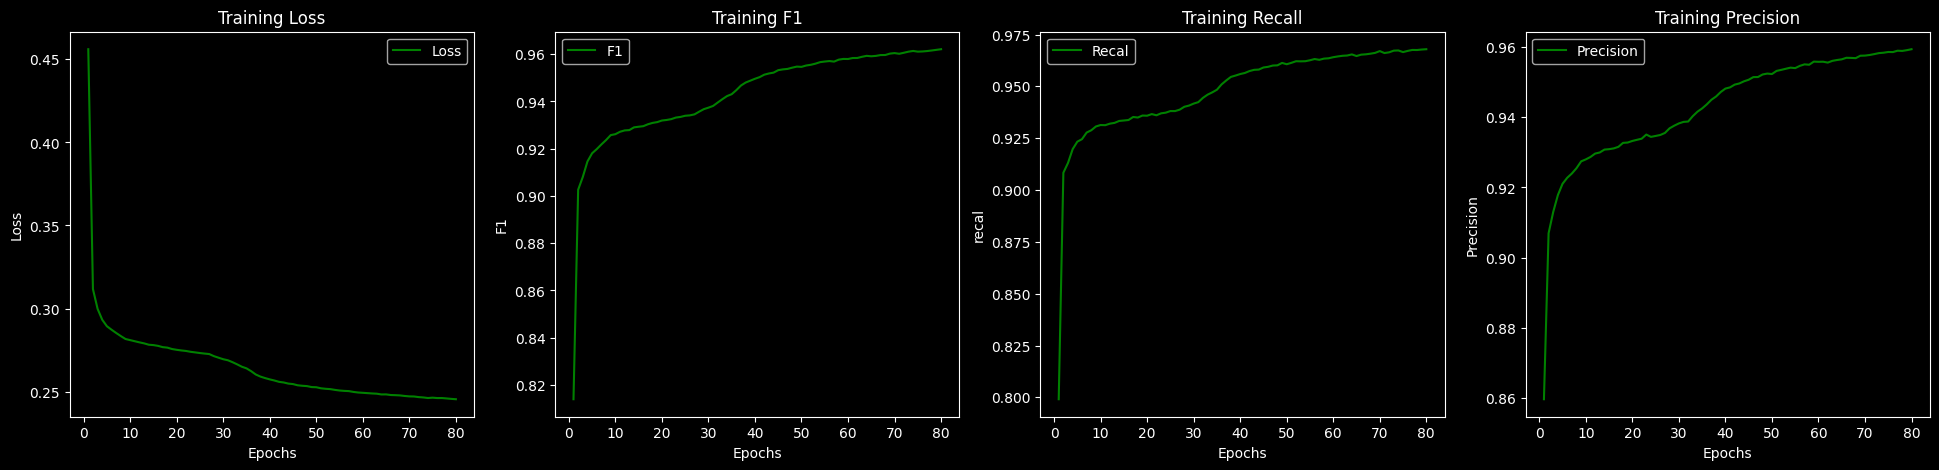

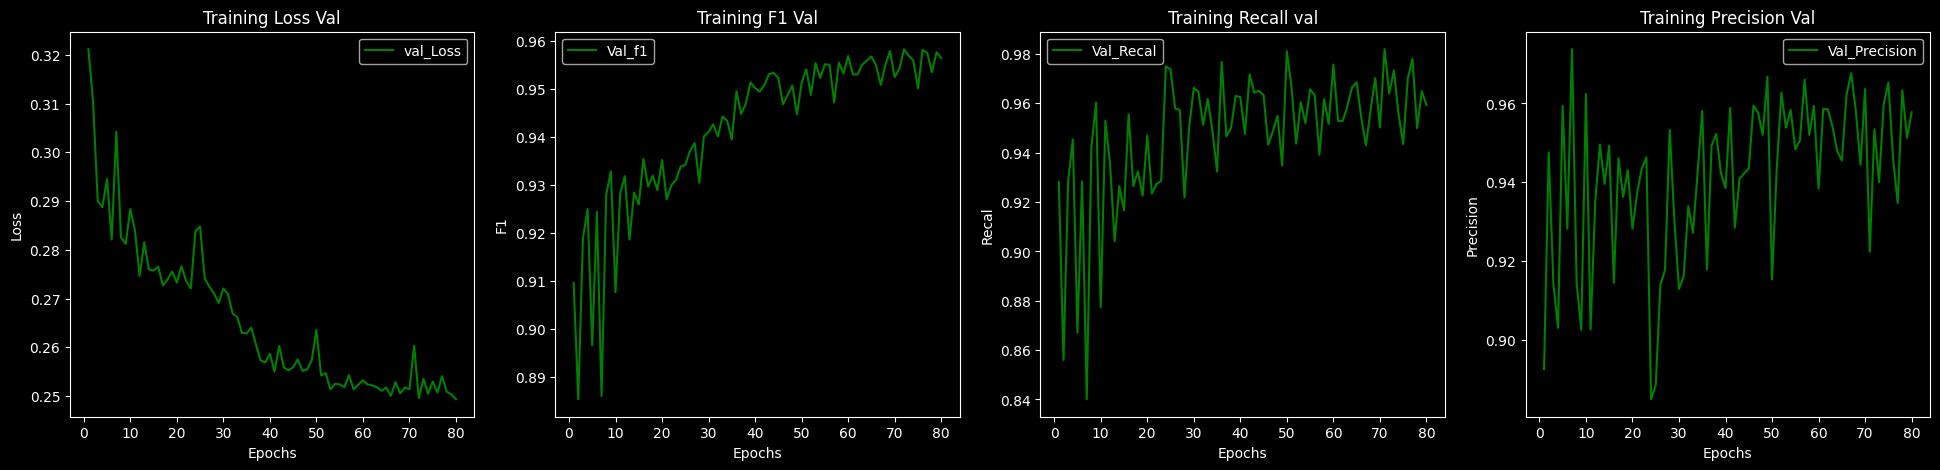

In [24]:

def plot_history(history):
    # Trích xuất dữ liệu từ history
    loss = history.history['loss']
    loss_val_ = history.history['val_loss']
    f1_ = history.history['f1_score']
    val_f1_score_ = history.history['val_f1_score']
    val_recall_ = history.history['val_recall_1']
    recall_ = history.history['recall_1']
    val_precision_ = history.history['val_precision_1']
    precision_ = history.history['precision_1']

    
    epochs = range(1, len(loss) + 1)

    # Vẽ loss
    plt.figure(figsize=(24, 5))

    plt.subplot(1, 4, 1)
    plt.plot(epochs, loss, 'green', label='Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 4, 2)
    plt.plot(epochs, f1_, 'green', label='F1')
    plt.xlabel('Epochs')
    plt.ylabel('F1')
    plt.title('Training F1')
    plt.legend()
   
    plt.subplot(1, 4, 3)
    plt.plot(epochs, recall_, 'green', label='Recal')
    plt.xlabel('Epochs')
    plt.ylabel('recal')
    plt.title('Training Recall')
    plt.legend()
   
    plt.subplot(1, 4, 4)
    plt.plot(epochs, precision_, 'green', label='Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.title('Training Precision')
    plt.legend()
    

    
    plt.show()

    plt.figure(figsize=(24, 5))

    plt.subplot(1, 4, 1)
    plt.plot(epochs, loss_val_, 'green', label='val_Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Val')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(epochs, val_f1_score_, 'green', label='Val_f1')
    plt.xlabel('Epochs')
    plt.ylabel('F1')
    plt.title('Training F1 Val')
    plt.legend()
   
    plt.subplot(1, 4, 3)
    plt.plot(epochs, val_recall_, 'green', label='Val_Recal')
    plt.xlabel('Epochs')
    plt.ylabel('Recal')
    plt.title('Training Recall val')
    plt.legend()
   
    plt.subplot(1, 4, 4)
    plt.plot(epochs, val_precision_, 'green', label='Val_Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.title('Training Precision Val')
    plt.legend()
    
    plt.show()
plot_history(h_)